In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset,random_split
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingWarmRestarts,PolynomialLR
from torchvision import transforms, models 
from Data_loader import CustomDataset
from Model import Mobile_Net
import warnings
warnings.filterwarnings("ignore") 
from Chekpoint import Checkpoint
from torchvision import models
from torchsummary import summary   
import cv2   
import PIL 

In [12]:
import torch 
loaded_model = torch.load(r'C:\Users\Ali\Desktop\DIG\Documents\Doc_v1\model\net.pth')  
loaded_model2 = torch.load('net.pth') 

In [153]:
path = r'C:\Users\Ali\Desktop\DIG\Noisee_denoise\noise_contrast_remove'
addr_imgs = os.listdir(path)

addr_imgs =   os.path.join(path,addr_imgs[15])
img_org = cv2.imread(addr_imgs)
addr_imgs  

'C:\\Users\\Ali\\Desktop\\DIG\\Noisee_denoise\\noise_contrast_remove\\1 (23).png'

torch.Size([3, 224, 1792])

In [156]:
#img_path = r'C:\Users\Ali\Desktop\DIG\Noisee_denoise\output.png'
#img_path = error_path = os.path.join(path1,a[112])


#img_path = img_org 
img_path = out
img_p = PIL.Image.fromarray(img_path)
#img1 = Image.open(img_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224,1792)),
    transforms.ToTensor()
]) 
img = transform(img_p) 

height = 1792 
width = 224
channels = 3 

# Calculate the height of each sub-image
sub_image_height = height // 8  # Divide by the number of desired parts

# Split the image into 8 equal parts along the height
sub_images = []
for i in range(8):
    start_row = i * sub_image_height
    end_row = (i + 1) * sub_image_height

    sub_image = img[:,:,start_row:end_row]
    sub_images.append(sub_image)          

def OCR(Digit):
    out = loaded_model(Digit.unsqueeze(0))
    _,pred = torch.max(out.data,1)
    return pred.item()
Dig = []
for d in sub_images:
    Dig.append(OCR(d))

Dig     

[0, 0, 0, 6, 0, 0, 1, 2]

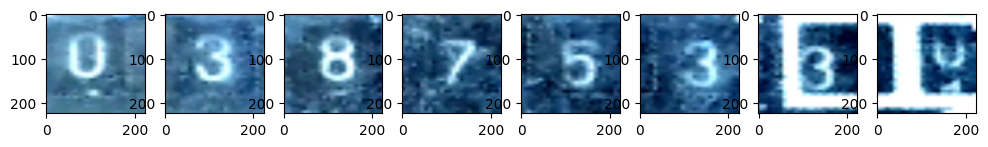

In [138]:
def show_images(images):
    plt.figure(figsize=(12, 6))
    for i in range(8):
        plt.subplot(1, 8, i + 1)
        img = np.transpose(sub_images[i].numpy(), (1, 2, 0))
        plt.imshow(img)
    plt.show()

# Display the batch of images

show_images(sub_images)  

In [31]:
path = r'C:\Users\Ali\Desktop\DIG\Noisee_denoise\noise_contrast_remove'
addr_imgs = os.listdir(path)

addr_imgs =  os.path.join(path,addr_imgs[2])
addr_imgs

'C:\\Users\\Ali\\Desktop\\DIG\\Noisee_denoise\\noise_contrast_remove\\1 (11).png'